## Pasajeros de Avion con Facebook Prophet

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('./airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'], yearfirst=True)

In [5]:
df.describe()

,ds,y
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


In [6]:
df.head(20)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


01:30:35 - cmdstanpy - INFO - Chain [1] start processing
01:30:35 - cmdstanpy - INFO - Chain [1] done processing
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


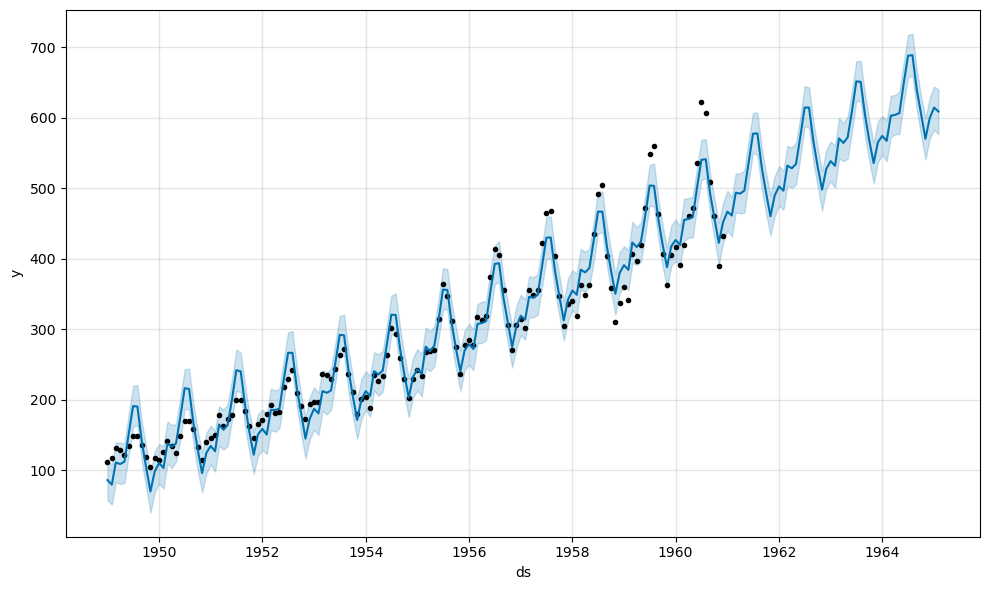

In [7]:
m = Prophet()
m.fit(df)
# Para 50 meses
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

Esta serie temporal tiene un ciclo anual, pero la estacionalidad en el pronóstico es demasiado grande al comienzo de la serie temporal y demasiado pequeña al final. En esta serie de tiempo, la estacionalidad no es un factor aditivo constante como lo supone Prophet por defecto, sino que crece con la tendencia. Esta es la estacionalidad multiplicativa.

### Cambiamos la frecuencia a multiplicativa

01:30:35 - cmdstanpy - INFO - Chain [1] start processing
01:30:35 - cmdstanpy - INFO - Chain [1] done processing
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


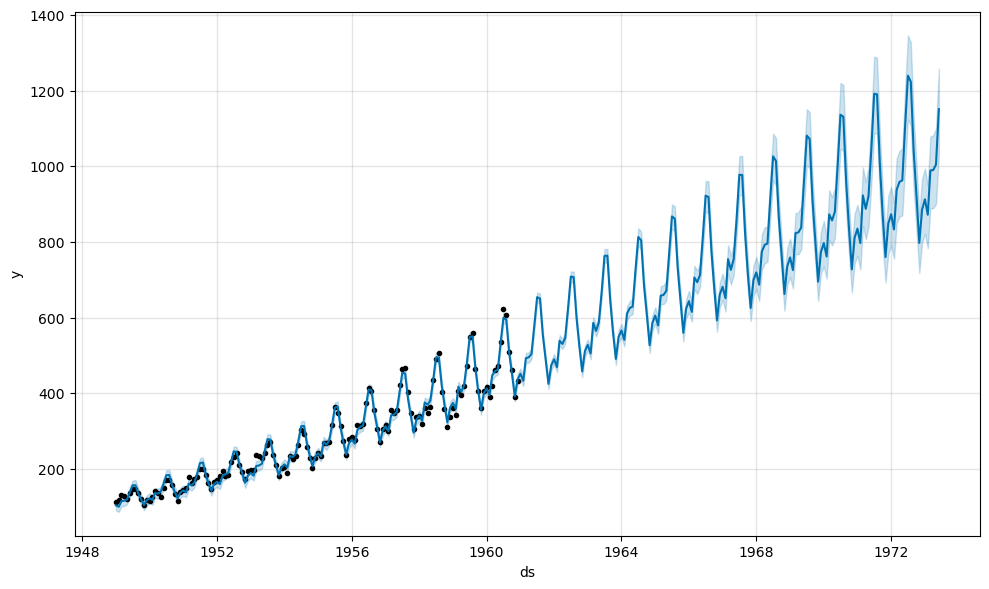

In [8]:
# Prophet tiene muchos parametros - es clave ajustarlos bien y conocerlos para no acabar con los valores por defecto

m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(150, freq='MS')

forecast = m.predict(future)
fig = m.plot(forecast)

01:30:36 - cmdstanpy - INFO - Chain [1] start processing
01:30:36 - cmdstanpy - INFO - Chain [1] done processing
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


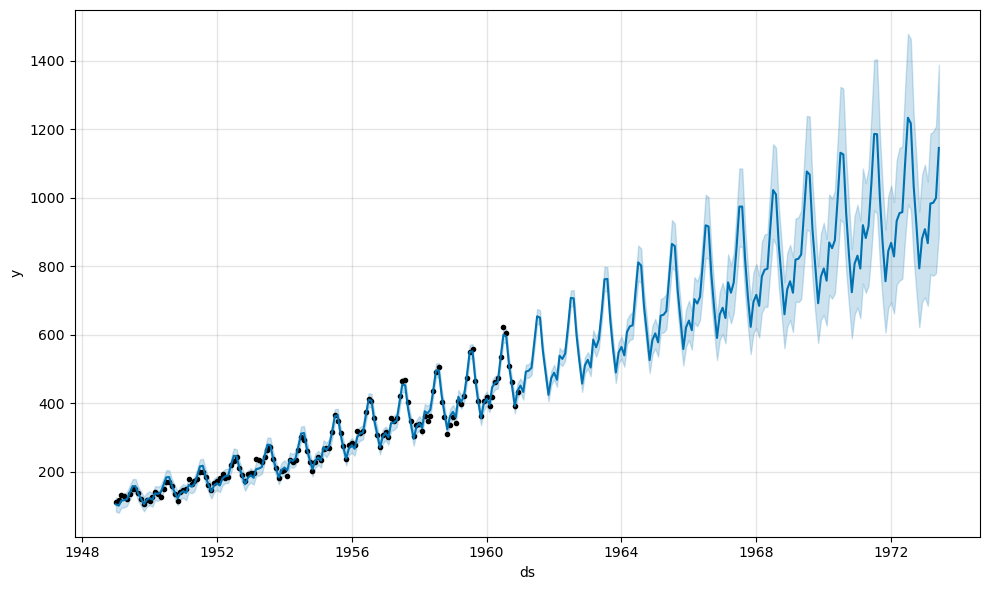

In [9]:
m = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(df) / 12),
    yearly_seasonality=True,
    interval_width=0.95)

m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

In [10]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None, scaling: str = 'absmax', holidays_mode=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_